In [1]:
using CSV, DataFrames, Polynomials, Plots

In [2]:
# Read data from CSV file
# Strip spaces from column names
df = CSV.read("series.csv", DataFrame)
rename!(df, Symbol.(strip.(string.(names(df)), ' ')))

Row,xs,ys1,ys2,ys3
,Int64,Int64,Int64,Int64
1,0,5,5,5
2,1,9,12,14
3,2,13,25,41
4,3,17,44,98
5,4,21,69,197
6,5,25,100,350
7,6,29,137,569
8,7,33,180,866
9,8,37,229,1253


In [3]:
# Extract columns from DataFrame
xs = df.xs
ys = df.ys1
println(xs, "\n", ys, "\n")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53]



In [4]:
# Perform linear regression for ys
pf = fit(xs, ys, 1)
cfs_r = reverse(coeffs(pf))
cfs_fmt = [
  round(c, digits=2) for c in cfs_r]

println("Coefficients (a, b) for ys:")
println(cfs_fmt, "\n")

Coefficients (a, b) for ys:
[4.0, 5.0]



In [5]:
# Generate Series for Plotting
xp = range(minimum(xs), maximum(xs), length=100)
yp = pf.(xp)

100-element Vector{Float64}:
  4.999999999999997
  5.484848484848483
  5.969696969696967
  6.4545454545454515
  6.939393939393937
  7.424242424242422
  7.9090909090909065
  8.393939393939391
  8.878787878787875
  9.36363636363636
  9.848484848484846
 10.33333333333333
 10.818181818181817
  ⋮
 47.666666666666664
 48.15151515151515
 48.63636363636363
 49.121212121212125
 49.60606060606061
 50.09090909090909
 50.57575757575758
 51.06060606060606
 51.54545454545455
 52.03030303030303
 52.515151515151516
 53.0

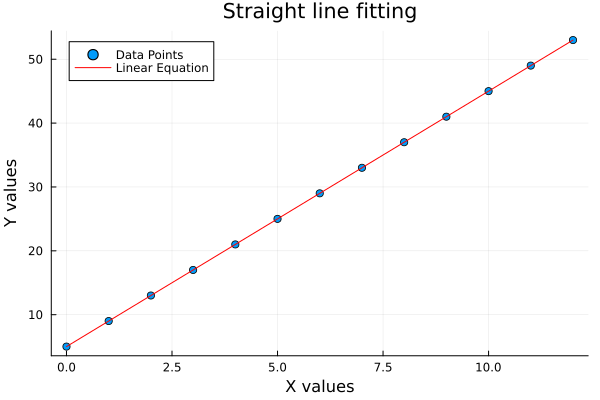

In [6]:
# Plotting
scatter(xs, ys,
  label="Data Points")
plot!(xp, yp, color=:red,
  label="Linear Equation")
xlabel!("X values")
ylabel!("Y values")
title!("Straight line fitting")